<a href="https://colab.research.google.com/github/agolbeny/Machine-Deep-Learning-Projects/blob/main/Dogs_vs_Cats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Extracting dataset using kaggle API
# Installing the kaggle library
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
# configuring the path of kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [7]:
# importing the Dog vs Cat dataset from kaggle
# kaggle API
!kaggle competitions download -c dogs-vs-cats

 99% 805M/812M [00:05<00:00, 202MB/s]
100% 812M/812M [00:05<00:00, 153MB/s]


In [8]:
!ls


dogs-vs-cats.zip  kaggle.json  sample_data


In [9]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/dogs-vs-cats.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is Extracted')

The dataset is Extracted


In [10]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/train.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is Extracted')

The dataset is Extracted


In [11]:
import os
# counting the number of files in train folder
path, dirs, files = next(os.walk('/content/train'))
file_count = len(files)
print('Number of images: ', file_count)

Number of images:  25000


In [12]:
# printing the name of images

In [13]:
file_names = os.listdir('/content/train')
print(file_names)

['cat.5159.jpg', 'cat.4869.jpg', 'cat.6287.jpg', 'cat.4140.jpg', 'cat.7473.jpg', 'cat.7708.jpg', 'cat.9746.jpg', 'dog.10648.jpg', 'cat.9488.jpg', 'dog.6925.jpg', 'cat.2023.jpg', 'cat.2067.jpg', 'cat.4734.jpg', 'dog.3496.jpg', 'dog.7765.jpg', 'dog.1560.jpg', 'dog.174.jpg', 'cat.10510.jpg', 'cat.6041.jpg', 'cat.10383.jpg', 'dog.429.jpg', 'dog.1104.jpg', 'dog.6480.jpg', 'dog.7422.jpg', 'cat.8339.jpg', 'dog.8490.jpg', 'dog.1128.jpg', 'dog.11297.jpg', 'cat.3558.jpg', 'cat.4831.jpg', 'cat.4311.jpg', 'cat.3760.jpg', 'dog.6678.jpg', 'cat.2635.jpg', 'dog.10873.jpg', 'cat.552.jpg', 'dog.6220.jpg', 'cat.4452.jpg', 'dog.5030.jpg', 'dog.3626.jpg', 'cat.8091.jpg', 'dog.9545.jpg', 'cat.2848.jpg', 'cat.791.jpg', 'cat.4522.jpg', 'cat.2638.jpg', 'dog.9447.jpg', 'cat.6560.jpg', 'cat.7394.jpg', 'cat.5153.jpg', 'cat.7299.jpg', 'cat.8475.jpg', 'dog.6026.jpg', 'cat.8148.jpg', 'cat.117.jpg', 'cat.1445.jpg', 'cat.11986.jpg', 'cat.7351.jpg', 'dog.12422.jpg', 'cat.5953.jpg', 'dog.2615.jpg', 'cat.400.jpg', 'cat.2

In [14]:
# importing the Dependencies
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mping
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

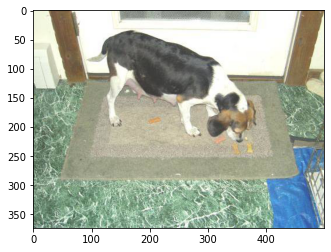

In [16]:
# displaying the images of dogs and cats
# display dog images
img = mping.imread('/content/train/dog.8931.jpg')
imgplt= plt.imshow(img)
plt.show()

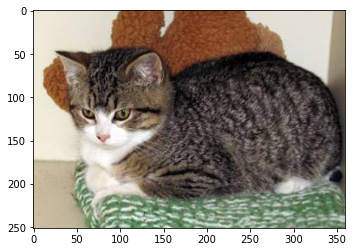

In [18]:
# display cat images
img = mping.imread('/content/train/cat.6287.jpg')
imgplt= plt.imshow(img)
plt.show()

In [21]:
file_names = os.listdir('/content/train')

for i in range(5):

  name = file_names[i]
  print(name[0:3])

cat
cat
cat
cat
cat


In [22]:
file_names = os.listdir('/content/train')
dog_count = 0
cat_count = 0
for img_file in file_names:
  name = img_file[0:3]
  if name == 'dog':
    dog_count += 1

  else:
    cat_count += 1

print('Number of dog images = ', dog_count)
print('Number of cat images = ', cat_count)

Number of dog images =  12500
Number of cat images =  12500


In [23]:
# Resizing all the images
# creating  a directory for resized images
os.mkdir('/content/image resized')

In [58]:
original_folder = '/content/train/'
resized_folder = '/content/image resized/'

for i in range(2000):
  filename = os.listdir(original_folder)[i]
  img_path = original_folder+filename

  img = Image.open(img_path)
  img = img.resize((224, 224))
  img = img.convert('RGB')


  newImgPath = resized_folder+filename
  img.save(newImgPath)

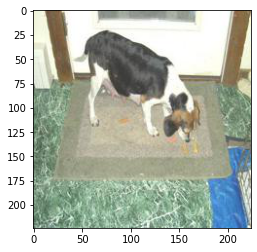

In [59]:
# display resized dog images
img = mping.imread('/content/image resized/dog.8931.jpg')
imgplt= plt.imshow(img)
plt.show()

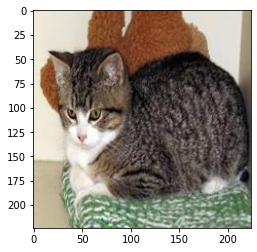

In [60]:
# display resized cat images
img = mping.imread('/content/image resized/cat.6287.jpg')
imgplt= plt.imshow(img)
plt.show()

In [61]:
# creating labels for resized images of dogs and cats
# Cat -> 0
# Dog -> 1


# creating a for loop to assign labels
filenames = os.listdir('/content/image resized/')
labels = []

for i in range(2000):
  file_name = filenames[i]
  label = file_name[0:3]

  if label == 'dog':
    labels.append(1)

  else:
    labels.append(0)

In [62]:
print(filenames[0:5])

['cat.5159.jpg', 'cat.4869.jpg', 'cat.6287.jpg', 'cat.4140.jpg', 'cat.7473.jpg']


In [63]:
print(len(filenames))

2000


In [64]:
print(labels[0:51])

[0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0]


In [65]:
# counting the image of dogs and cats out of 2000 images
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[ 972 1028]


In [66]:
# converting all the resized images to numpy arrays
import cv2
import glob

In [67]:
image_directory = '/content/image resized/'
image_extension = ['png', 'jpg']

files = []
[files.extend(glob.glob(image_directory +  '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [68]:
print(dog_cat_images)

[[[[128 142 161]
   [123 138 157]
   [123 138 157]
   ...
   [208 212 223]
   [208 212 223]
   [207 211 222]]

  [[121 135 154]
   [131 146 165]
   [131 146 165]
   ...
   [209 214 223]
   [209 213 224]
   [208 213 222]]

  [[136 150 169]
   [118 133 152]
   [118 133 152]
   ...
   [211 217 224]
   [210 215 224]
   [209 215 222]]

  ...

  [[168 151 242]
   [172 155 236]
   [174 155 218]
   ...
   [ 61  54  39]
   [ 55  49  36]
   [ 53  47  34]]

  [[177 156 241]
   [181 159 237]
   [182 157 217]
   ...
   [ 36  32  37]
   [ 33  29  35]
   [ 32  28  34]]

  [[172 149 233]
   [179 156 230]
   [181 156 214]
   ...
   [ 34  31  46]
   [ 32  29  45]
   [ 31  28  44]]]


 [[[138 166 177]
   [137 165 176]
   [136 164 175]
   ...
   [ 21  74 111]
   [ 20  73 110]
   [ 19  72 109]]

  [[141 169 180]
   [140 168 179]
   [139 167 178]
   ...
   [ 24  77 114]
   [ 23  76 113]
   [ 22  75 112]]

  [[145 173 184]
   [144 172 183]
   [143 171 182]
   ...
   [ 25  80 117]
   [ 24  79 116]
   [ 23  78

In [69]:
type(dog_cat_images)

numpy.ndarray

In [70]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


In [71]:
x = dog_cat_images
y = np.asarray(labels)

In [72]:
# train test split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=2)


In [73]:
print(x.shape, x_train.shape, x_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


In [74]:
# 1600 -> training images
# 400 -> test images


In [75]:
# scaling the data
x_train_scaled = x_train/255
x_test_scaled = x_test/255

In [76]:
print(x_train_scaled)

[[[[0.51764706 0.61960784 0.64705882]
   [0.54901961 0.65098039 0.67843137]
   [0.57647059 0.65882353 0.69019608]
   ...
   [0.3254902  0.37254902 0.41176471]
   [0.11372549 0.15294118 0.19215686]
   [0.62745098 0.66666667 0.70588235]]

  [[0.55686275 0.65882353 0.68627451]
   [0.54509804 0.64705882 0.6745098 ]
   [0.53333333 0.61568627 0.64705882]
   ...
   [0.30980392 0.35686275 0.39607843]
   [0.1372549  0.17647059 0.21568627]
   [0.65882353 0.69803922 0.7372549 ]]

  [[0.50588235 0.60392157 0.64313725]
   [0.52156863 0.61960784 0.65882353]
   [0.58823529 0.66666667 0.70980392]
   ...
   [0.27058824 0.31764706 0.35686275]
   [0.17254902 0.21176471 0.25098039]
   [0.69411765 0.73333333 0.77254902]]

  ...

  [[0.21568627 0.38431373 0.7254902 ]
   [0.09803922 0.2745098  0.61568627]
   [0.07843137 0.24705882 0.58823529]
   ...
   [0.45490196 0.50196078 0.50980392]
   [0.47058824 0.51764706 0.5254902 ]
   [0.52156863 0.56862745 0.57647059]]

  [[0.10196078 0.2627451  0.59607843]
   [0.0

In [77]:
# building the NN
import tensorflow as tf
import tensorflow_hub as hub

In [78]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'
pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [79]:
num_of_classes = 2

model = tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense_1 (Dense)             (None, 2)                 2562      
                                                                 
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [80]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics = ['acc']
)

In [81]:
model.fit(x_train_scaled, y_train, epochs=5)

Epoch 1/5
50/50 [==============================] - 50s 919ms/step - loss: 0.2497 - acc: 0.8988
Epoch 2/5
50/50 [==============================] - 47s 933ms/step - loss: 0.0808 - acc: 0.9725
Epoch 3/5
50/50 [==============================] - 47s 936ms/step - loss: 0.0675 - acc: 0.9769
Epoch 4/5
50/50 [==============================] - 48s 968ms/step - loss: 0.0545 - acc: 0.9831
Epoch 5/5
50/50 [==============================] - 47s 939ms/step - loss: 0.0442 - acc: 0.9862


In [83]:
score, acc = model.evaluate(x_test_scaled, y_test)
print('test loss = ', score)
print('test accuracy = ', acc)

13/13 [==============================] - 13s 887ms/step - loss: 0.0634 - acc: 0.9750
test loss =  0.06338101625442505
test accuracy =  0.9750000238418579


Path of the image to be predicted: /content/cat.jpg


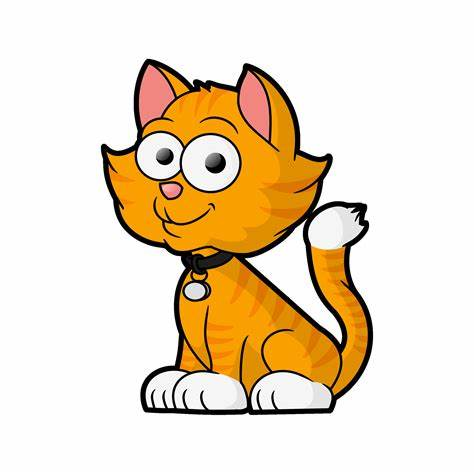

1/1 [==============================] - 0s 61ms/step
The image represents a Cat


In [85]:
# Predictive system
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))
input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1, 224,224,3])

input_prediction = model.predict(image_reshaped)
input_pred_label = np.argmax(input_prediction)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')

Path of the image to be predicted: /content/dog.jpg


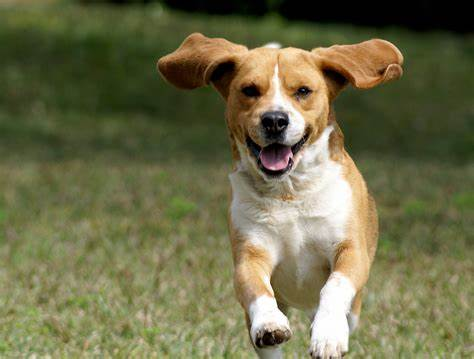

1/1 [==============================] - 0s 77ms/step
The image represents a Dog


In [86]:
# Predictive system
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))
input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1, 224,224,3])

input_prediction = model.predict(image_reshaped)
input_pred_label = np.argmax(input_prediction)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')

Path of the image to be predicted: /content/Dog1.jpg


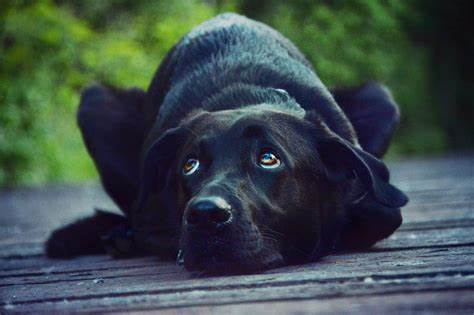

1/1 [==============================] - 0s 72ms/step
The image represents a Dog


In [87]:
# Predictive system
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))
input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1, 224,224,3])

input_prediction = model.predict(image_reshaped)
input_pred_label = np.argmax(input_prediction)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')

Path of the image to be predicted: /content/cat1.jpg


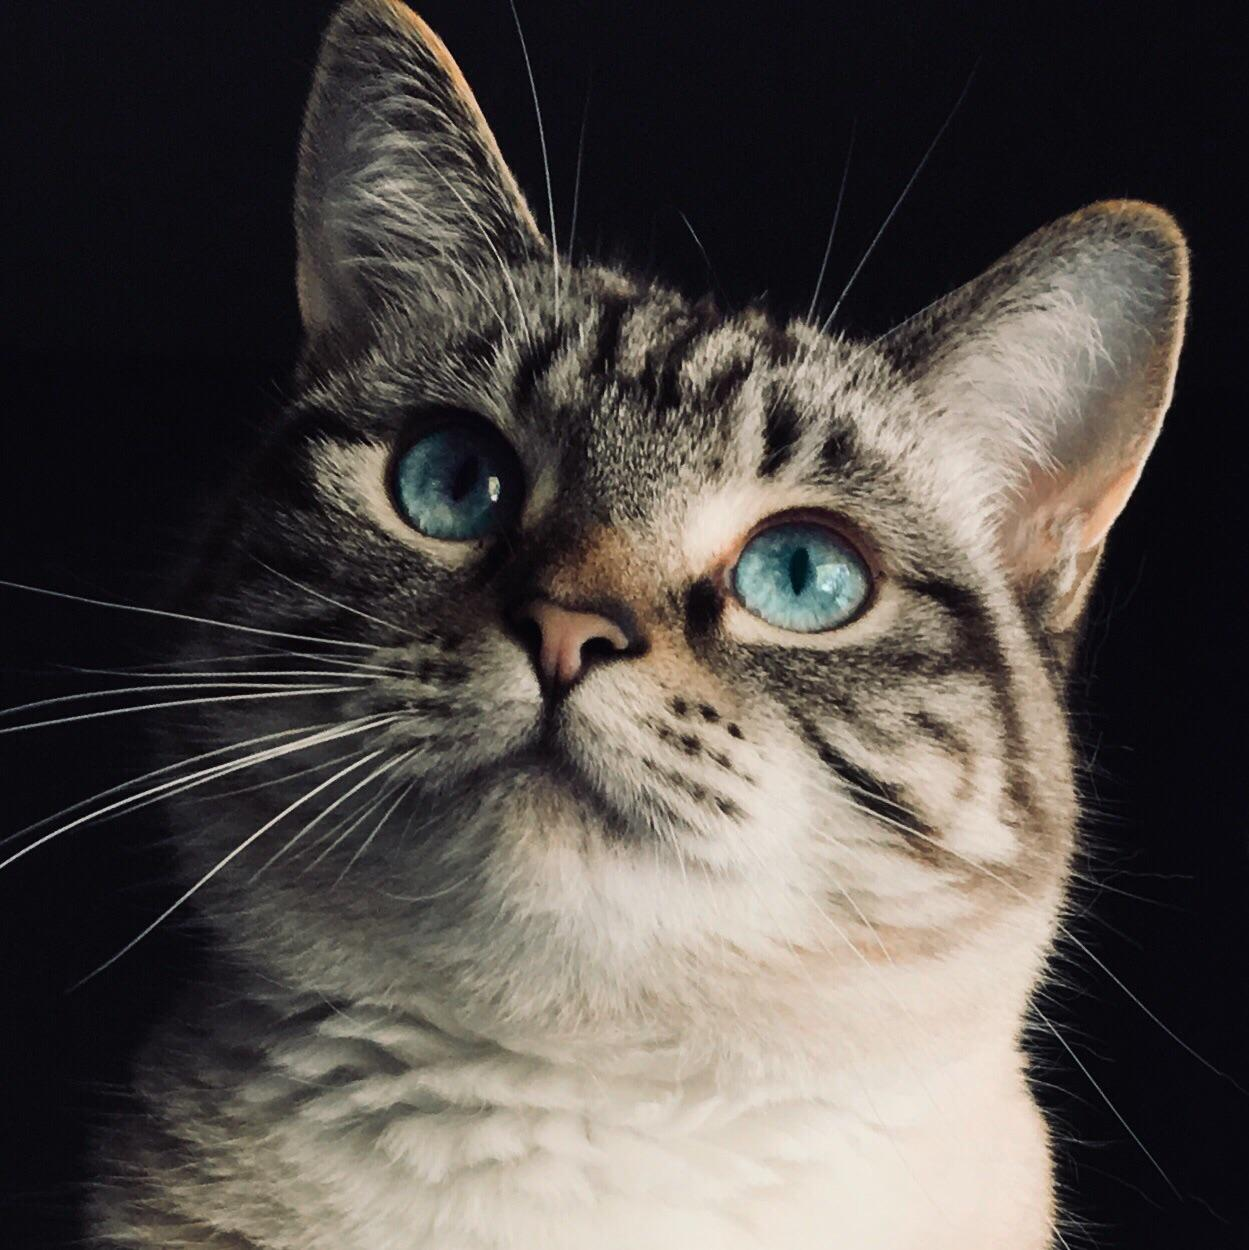

1/1 [==============================] - 0s 87ms/step
The image represents a Cat


In [89]:
# Predictive system
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))
input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1, 224,224,3])

input_prediction = model.predict(image_reshaped)
input_pred_label = np.argmax(input_prediction)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')